In [22]:
import yfinance as yf

# Get data for Apple (AAPL)
data = yf.download("AAPL", start="2024-06-01", end="2025-06-15")

print(data.tail())  # Show latest data


C:\Users\shobh\AppData\Local\Temp\ipykernel_348\4116090396.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-06-01", end="2025-06-15")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-06-09  201.449997  206.000000  200.020004  204.389999  72862600
2025-06-10  202.669998  204.350006  200.570007  200.600006  54672600
2025-06-11  198.779999  204.500000  198.410004  203.500000  60989900
2025-06-12  199.199997  199.679993  197.360001  199.080002  43904600
2025-06-13  196.449997  200.369995  195.699997  199.729996  51362400


In [23]:
ticker = yf.Ticker("AAPL")
latest_price = ticker.info["currentPrice"]
print("Latest Price:", latest_price)
data

Latest Price: 198.42


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-06-03,193.126801,194.082338,191.623835,192.002056,50080500
2024-06-04,193.445328,194.410814,192.131465,193.733971,47471400
2024-06-05,194.958237,195.983441,193.962892,194.490423,54156800
2024-06-06,193.574692,195.585293,193.266137,194.779066,41181800
2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900
...,...,...,...,...,...
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600


In [24]:
data.shape   #shows the number of rows and columns in the DataFrame

(259, 5)

In [25]:
data.columns


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [27]:
#flattening MultiINdex columns : join outer and inner with '_'
# Flatten MultiIndex if necessary
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
data.columns = [col.replace('_AAPL', '') for col in data.columns]


# Data Preprocessing
Handling Missing Values,
Normalizing,
Feature Engineering

In [28]:
#checking for missing values 
print(data.isnull().sum())  

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [29]:
# Normalizing Data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [30]:
data_scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)

print(data_scaled)

               Close      High       Low      Open    Volume
Date                                                        
2024-06-03  0.242831  0.057530  0.257158  0.236211  0.090866
2024-06-04  0.246526  0.062264  0.262925  0.256386  0.082035
2024-06-05  0.264076  0.084930  0.283731  0.265198  0.104663
2024-06-06  0.248026  0.079191  0.275815  0.268560  0.060746
2024-06-07  0.275854  0.085504  0.275476  0.256502  0.101099
...              ...       ...       ...       ...       ...
2025-06-09  0.339385  0.229295  0.352545  0.380519  0.167977
2025-06-10  0.353537  0.205514  0.358794  0.336369  0.106409
2025-06-11  0.308411  0.207676  0.334254  0.370151  0.127791
2025-06-12  0.313283  0.138207  0.322325  0.318662  0.069962
2025-06-13  0.281382  0.148152  0.303466  0.326234  0.095204

[259 rows x 5 columns]


# EDA

Text(0.5, 1.0, 'Feature Correlation')

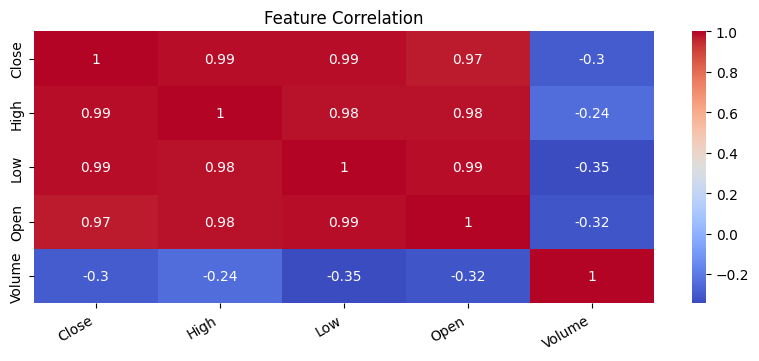

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of Close price
data['Close'].plot(figsize=(10,4), title='AAPL Closing Price')

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")


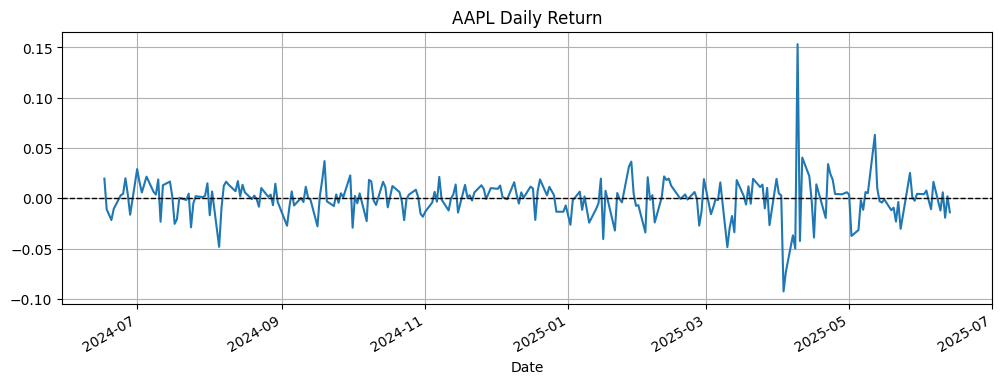

In [34]:
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,4))
data['Daily Return'].plot(title="AAPL Daily Return")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()


# Feature Engineering

In [36]:
data['Close_Lag1'] = data['Close'].shift(1)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# Create target: next day's close
data['Close_Next'] = data['Close'].shift(-1)

# Drop NaNs from rolling features
data.dropna(inplace=True)


In [38]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['Close_Lag1', 'MA5', 'MA10']]
y = data['Close_Next']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [39]:
from sklearn.linear_model import LinearRegression

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 86.5983
R² Score: -0.4388


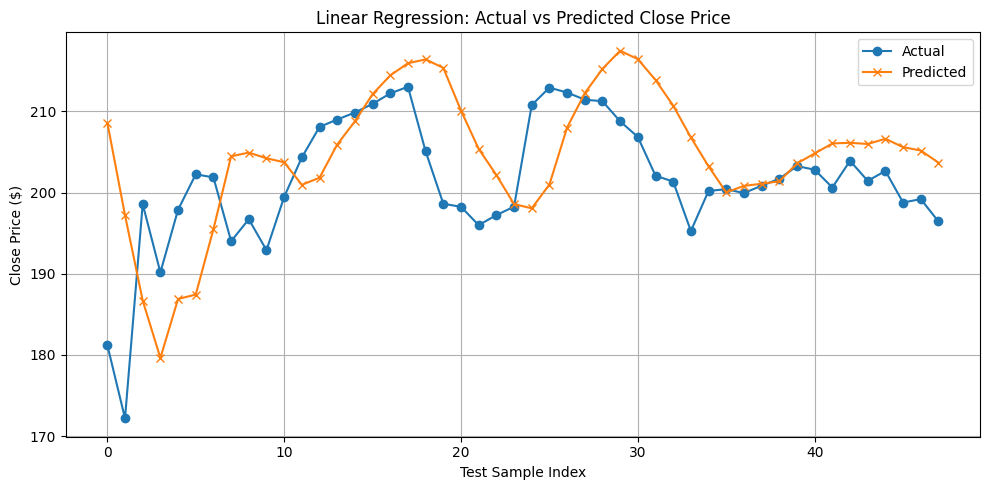

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Linear Regression: Actual vs Predicted Close Price")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shobh\AppData\Local\Temp\ipykernel_348\709171091.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2023-01-01', end='2025-06-15')
[*********************100%***********************]  1 of 1 completed

📉 Mean Squared Error (returns): 0.000688
📈 R² Score: -0.0335


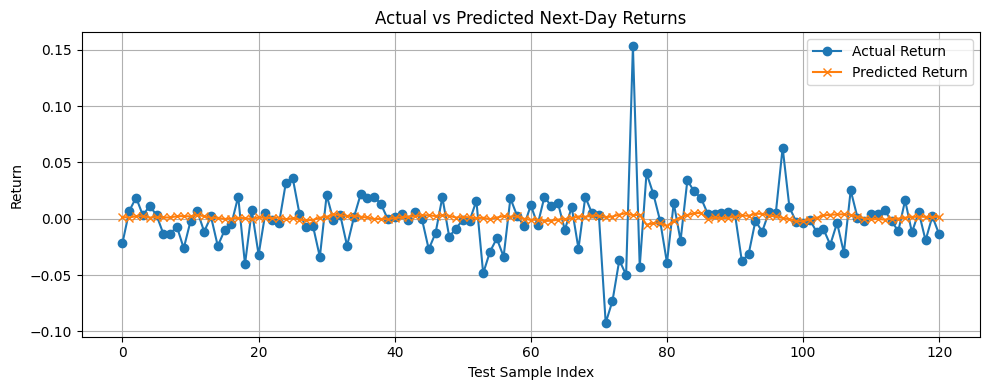

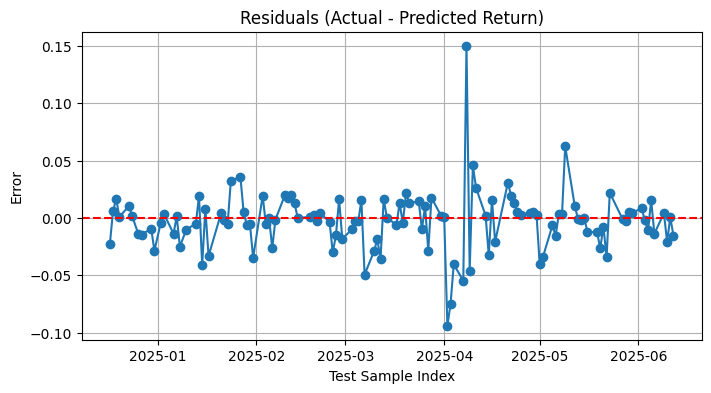

In [42]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = yf.download('AAPL', start='2023-01-01', end='2025-06-15')
df.dropna(inplace=True)

# --- STEP 1: Calculate Daily Returns ---
df['Return'] = df['Close'].pct_change()

# --- STEP 2: Create Target (Next Day Return) ---
df['Next_Return'] = df['Return'].shift(-1)

# --- STEP 3: Feature Engineering ---
df['Return_Lag1'] = df['Return'].shift(1)
df['Return_Lag2'] = df['Return'].shift(2)
df['MA_Return5'] = df['Return'].rolling(window=5).mean()
df['MA_Return10'] = df['Return'].rolling(window=10).mean()

# Drop NaNs from new features
df.dropna(inplace=True)

# --- STEP 4: Define Features and Target ---
X = df[['Return_Lag1', 'Return_Lag2', 'MA_Return5', 'MA_Return10']]
y = df['Next_Return']

# --- STEP 5: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --- STEP 6: Train Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- STEP 7: Predictions ---
y_pred = model.predict(X_test)

# --- STEP 8: Evaluation ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (returns): {mse:.6f}")
print(f"📈 R² Score: {r2:.4f}")

# --- STEP 9: Plot Predicted vs Actual Returns ---
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual Return', marker='o')
plt.plot(y_pred, label='Predicted Return', marker='x')
plt.title("Actual vs Predicted Next-Day Returns")
plt.xlabel("Test Sample Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- STEP 10: Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.plot(residuals, marker='o', label='Residual')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (Actual - Predicted Return)")
plt.xlabel("Test Sample Index")
plt.ylabel("Error")
plt.grid(True)
plt.show()


C:\Users\shobh\AppData\Local\Temp\ipykernel_348\2011000769.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2023-01-01', end='2025-06-15')
[*********************100%***********************]  1 of 1 completed


📉 MSE (XGBoost): 0.000687
📈 R² Score (XGBoost): -0.0316


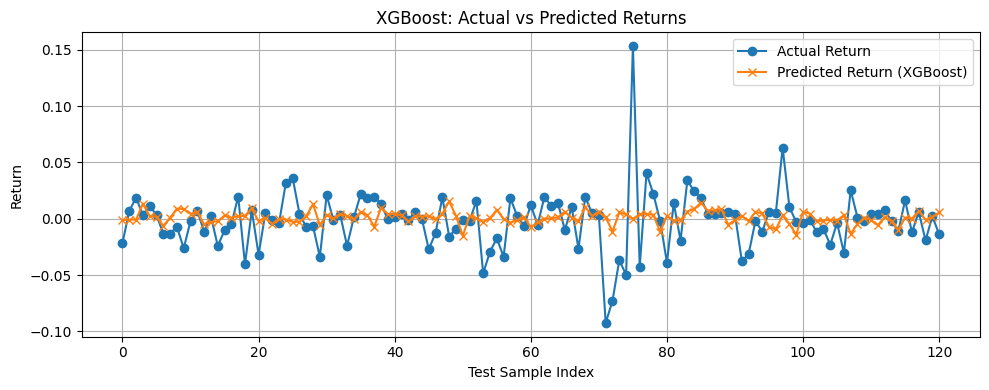

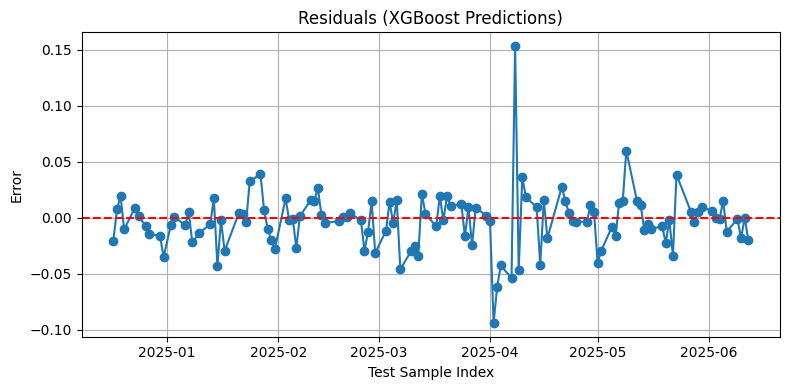

In [44]:
# using XGBOOST
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- Load Data ---
df = yf.download('AAPL', start='2023-01-01', end='2025-06-15')
df.dropna(inplace=True)

# --- Create Return Features ---
df['Return'] = df['Close'].pct_change()
df['Next_Return'] = df['Return'].shift(-1)

df['Return_Lag1'] = df['Return'].shift(1)
df['Return_Lag2'] = df['Return'].shift(2)
df['MA_Return5'] = df['Return'].rolling(window=5).mean()
df['MA_Return10'] = df['Return'].rolling(window=10).mean()

df.dropna(inplace=True)

# --- Define X and y ---
X = df[['Return_Lag1', 'Return_Lag2', 'MA_Return5', 'MA_Return10']]
y = df['Next_Return']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- Train XGBoost Model ---
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE (XGBoost): {mse:.6f}")
print(f"📈 R² Score (XGBoost): {r2:.4f}")

# --- Plot Predictions ---
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual Return', marker='o')
plt.plot(y_pred, label='Predicted Return (XGBoost)', marker='x')
plt.title("XGBoost: Actual vs Predicted Returns")
plt.xlabel("Test Sample Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Residuals ---
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.plot(residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (XGBoost Predictions)")
plt.xlabel("Test Sample Index")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Set up the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                    scoring='r2', cv=3, verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Tuned MSE: {mse:.6f}")
print(f"✅ Tuned R²: {r2:.4f}")
print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Tuned MSE: 0.000674
✅ Tuned R²: -0.0131
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
